## importing libraries

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [12]:
import warnings  
warnings.filterwarnings('ignore')

## importing data

In [16]:
sale = pd.read_csv('sale.csv')

In [17]:
sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Univariate analysis

In [18]:
sale.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## Distribution of age, annual income, spending score

In [22]:
sale.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

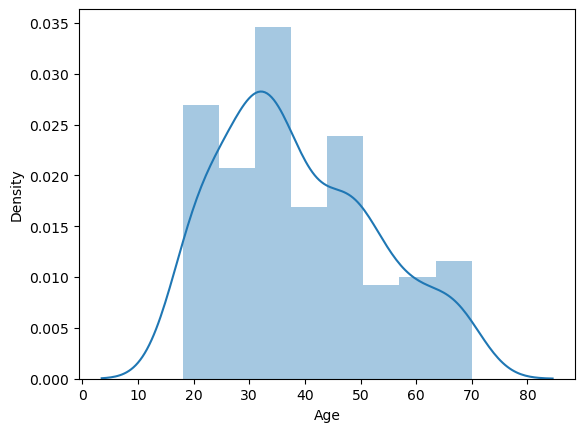

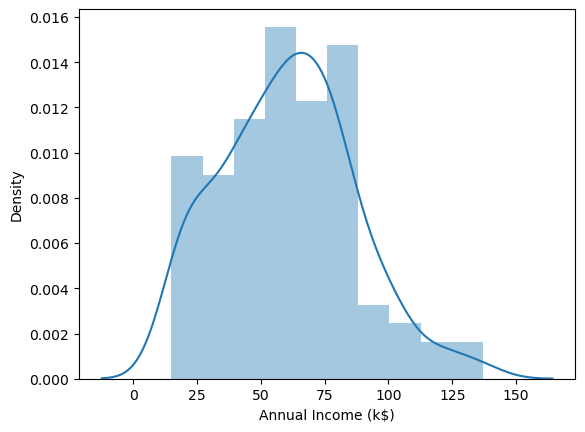

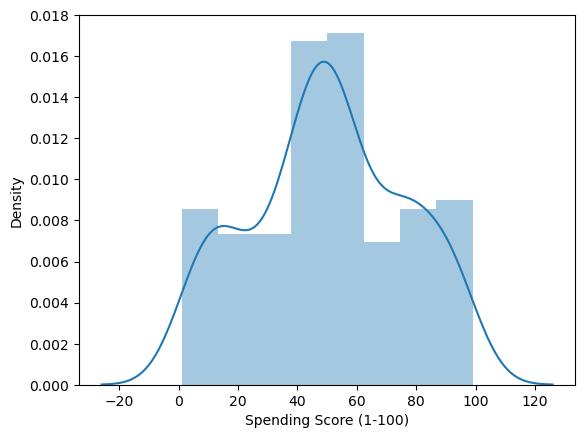

In [23]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in col:
    plt.figure()
    sns.distplot(sale[i])

## kdeplot

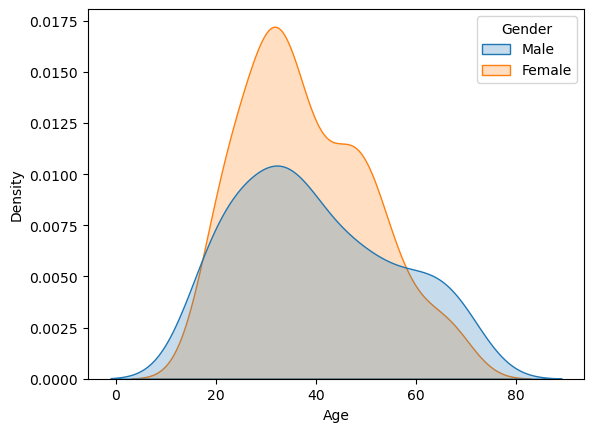

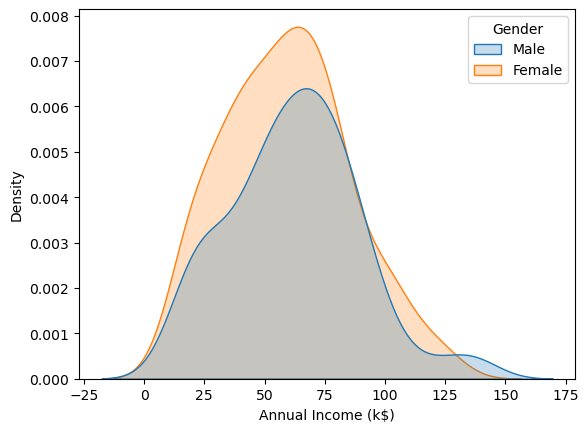

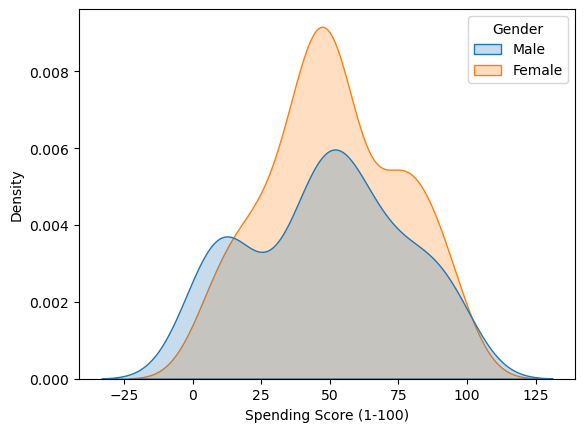

In [27]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in col:
    plt.figure()
    sns.kdeplot(sale[i],shade=True,legend=True,hue=sale['Gender'])

## box plot

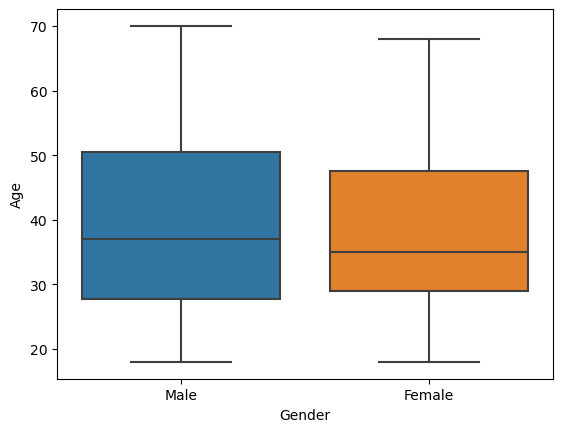

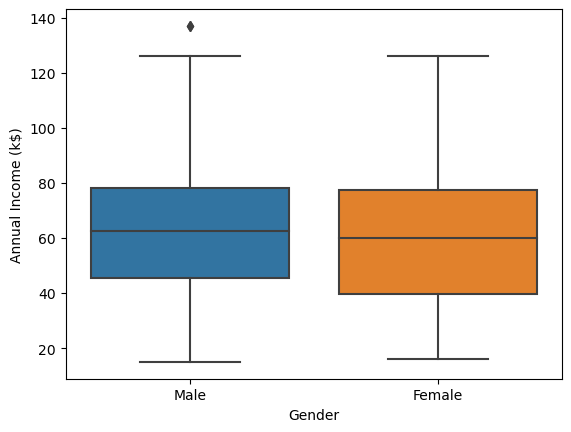

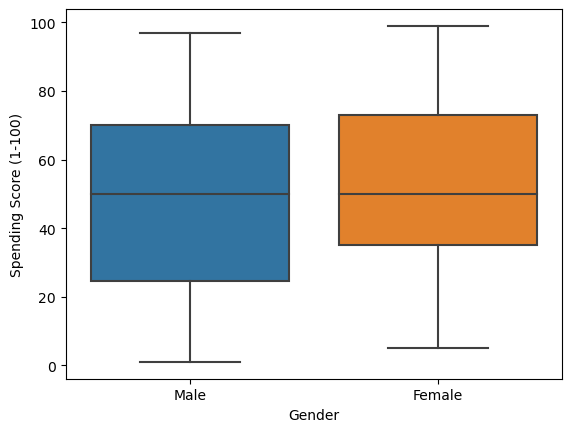

In [30]:
col = ['Age', 'Annual Income (k$)','Spending Score (1-100)']

for i in col:
    plt.figure()
    sns.boxplot(data=sale, x='Gender',y=sale[i])

In [31]:
sale.Gender.value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

## Bivariate analysis

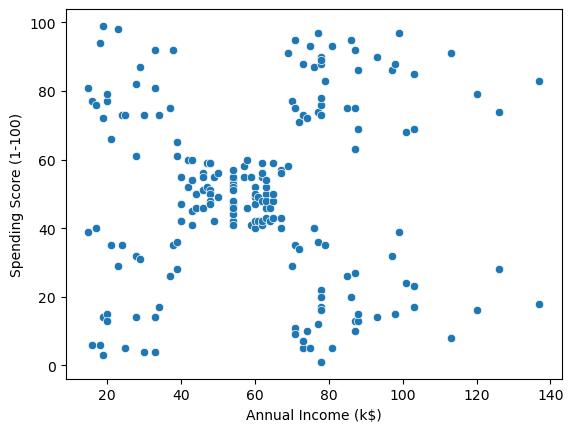

In [33]:
sns.scatterplot(data=sale,x='Annual Income (k$)',y='Spending Score (1-100)');

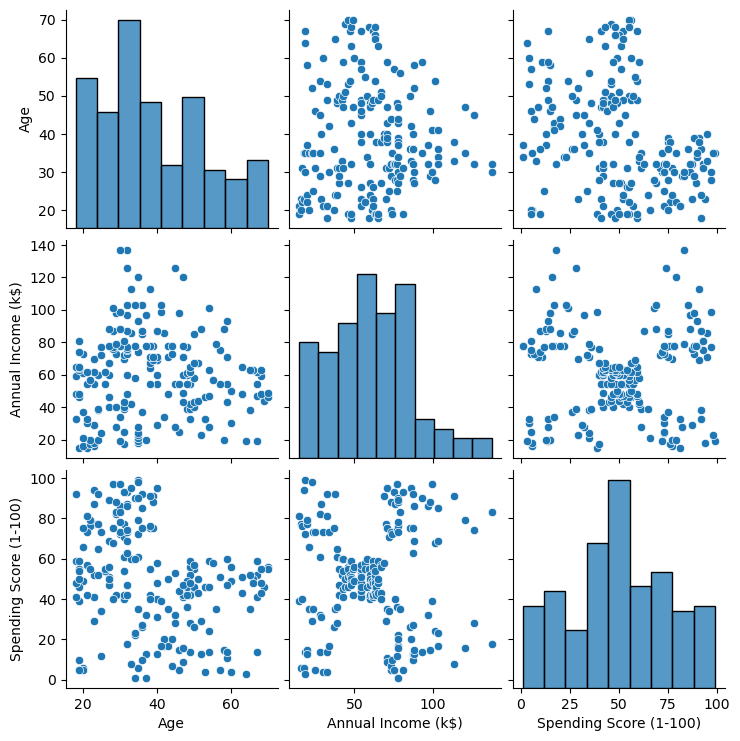

In [37]:
sale1=sale.drop('CustomerID',axis=1)
sns.pairplot(sale1);

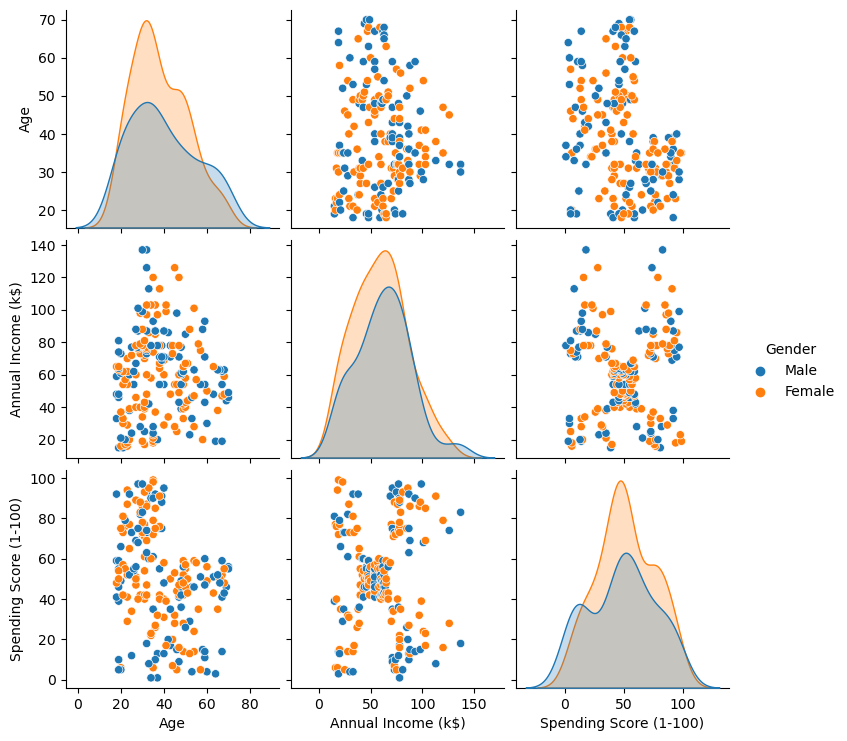

In [38]:
sns.pairplot(sale1,hue='Gender');

In [40]:
sale.groupby('Gender')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [42]:
sale1.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


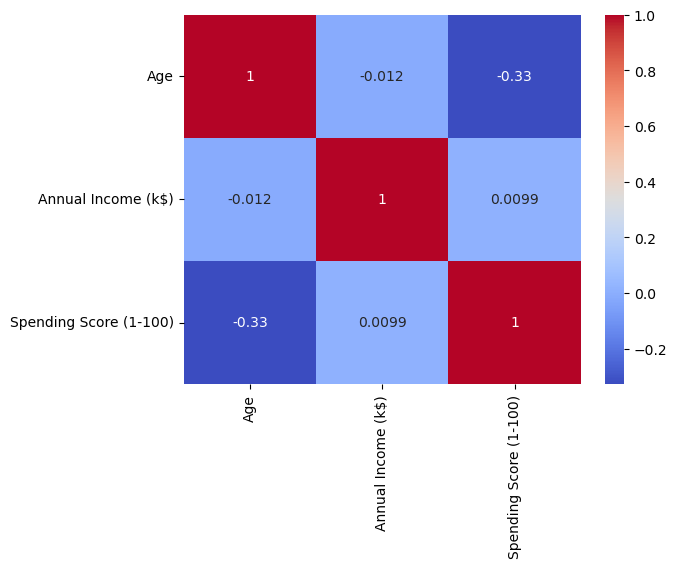

In [46]:
sns.heatmap(sale1.corr(),annot=True,cmap='coolwarm');

## Clustering - Univariate, Bivariate and Multivariate

### 1. Univariate

In [64]:
clustering1 = KMeans(n_clusters=6)

In [65]:
clustering1.fit(sale[['Annual Income (k$)']])

KMeans(n_clusters=6)

In [66]:
clustering1.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [67]:
sale['Income Clusters'] = clustering1.labels_
sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,3
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3


In [68]:
sale.value_counts('Income Clusters')

Income Clusters
2    46
0    44
5    42
3    32
1    28
4     8
dtype: int64

In [69]:
clustering1.inertia_

5081.484660267269

In [70]:
inertia_scores=[]

for i in range(1,11):
    kmeans =KMeans(i)
    kmeans.fit(sale[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

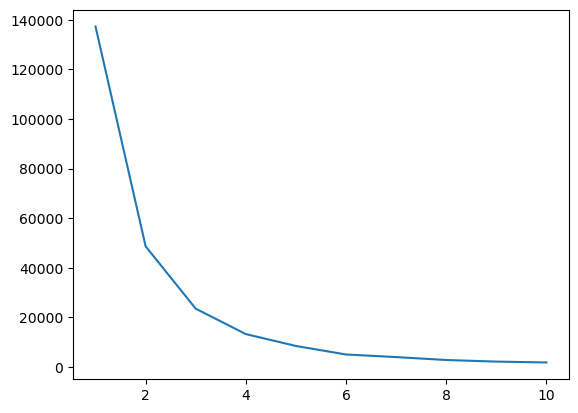

In [71]:
plt.plot(range(1,11),inertia_scores)

In [73]:
clustering1 = KMeans(n_clusters=3)
clustering1.fit(sale[['Annual Income (k$)']])
clustering1.labels_
sale['Income Clusters'] = clustering1.labels_
sale.value_counts('Income Clusters')

Income Clusters
0    90
1    74
2    36
dtype: int64

In [74]:
sale.groupby('Income Clusters')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Clusters,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


## 2. Bivariate

In [76]:
clustering2 = KMeans()
clustering2.fit(sale[['Annual Income (k$)','Spending Score (1-100)']])

KMeans()

In [78]:
sale['Spending and Income Cluster'] = clustering2.labels_
sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,1,Male,19,15,39,1,2
1,2,Male,21,15,81,1,5
2,3,Female,20,16,6,1,2
3,4,Female,23,16,77,1,5
4,5,Female,31,17,40,1,2


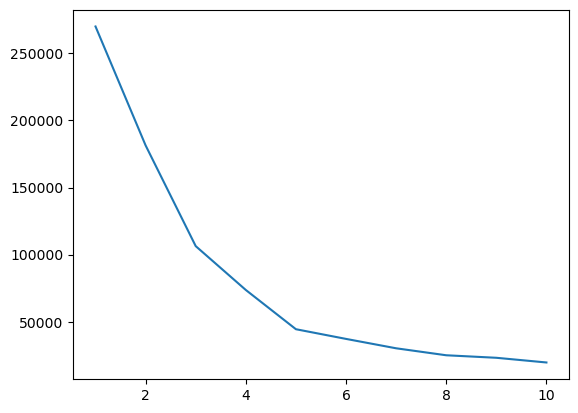

In [79]:
inertia_scores2=[]

for i in range(1,11):
    kmeans2 =KMeans(i)
    kmeans2.fit(sale[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)
    
plt.plot(range(1,11),inertia_scores2)

In [80]:
clustering2 = KMeans(5)
clustering2.fit(sale[['Annual Income (k$)','Spending Score (1-100)']])
sale['Spending and Income Cluster'] = clustering2.labels_
sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,0


In [92]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,25.727273,79.363636
4,88.200000,17.114286


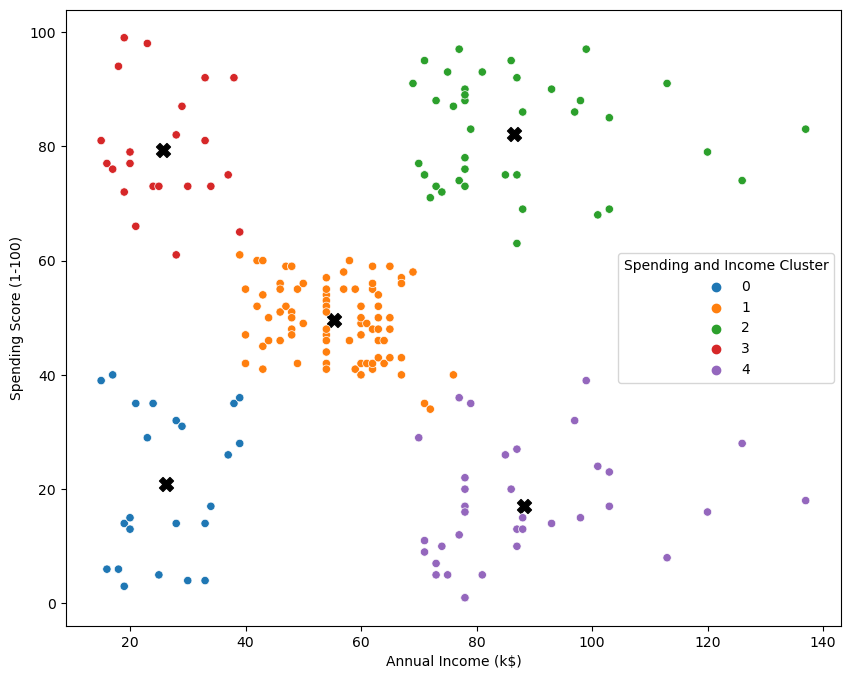

In [94]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers.x,y=centers.y,s=100,c='black',marker='X')
sns.scatterplot(data=sale,x='Annual Income (k$)',y='Spending Score (1-100)',hue= 'Spending and Income Cluster' ,palette= 'tab10');

In [96]:
pd.crosstab(sale['Spending and Income Cluster'],sale['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.608696,0.391304
1,0.592593,0.407407
2,0.538462,0.461538
3,0.590909,0.409091
4,0.457143,0.542857


In [97]:
sale.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)','Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,45.217391,26.304348,20.913043
1,42.716049,55.296296,49.518519
2,32.692308,86.538462,82.128205
3,25.272727,25.727273,79.363636
4,41.114286,88.200000,17.114286


## 3. Multivariable

In [100]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [101]:
sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,1,0


In [102]:
sale2=pd.get_dummies(sale,drop_first=True)
sale2.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster,Gender_Male
0,1,19,15,39,1,0,1
1,2,21,15,81,1,3,1
2,3,20,16,6,1,0,0
3,4,23,16,77,1,3,0
4,5,31,17,40,1,0,0


In [108]:
sale2.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'Income Clusters', 'Spending and Income Cluster', 'Gender_Male'],
      dtype='object')

In [114]:
sale2=sale2.drop(columns=['Income Clusters', 'Spending and Income Cluster'],axis=1)

In [115]:
sale2.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [118]:
sale2 = pd.DataFrame(scale.fit_transform(sale2))

In [119]:
sale2.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


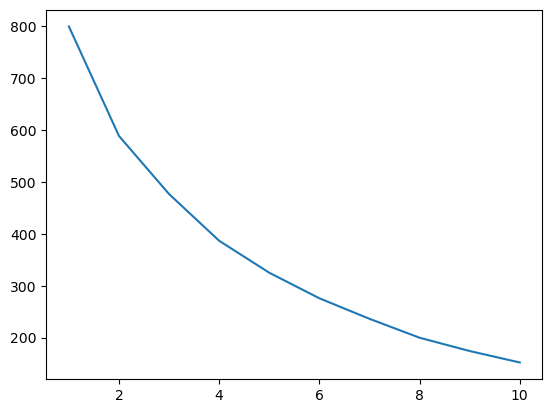

In [121]:
inertia_scores3=[]

for i in range(1,11):
    kmeans3 =KMeans(i)
    kmeans3.fit(sale2)
    inertia_scores3.append(kmeans3.inertia_)
    
plt.plot(range(1,11),inertia_scores3);

In [122]:
sale.to_csv('sale2.csv')

In [123]:
clustering3 = KMeans(5)
clustering3.fit(sale2)
sale['All Cluster'] = clustering3.labels_
sale.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Clusters,Spending and Income Cluster,All Cluster
0,1,Male,19,15,39,1,0,3
1,2,Male,21,15,81,1,3,3
2,3,Female,20,16,6,1,0,4
3,4,Female,23,16,77,1,3,1
4,5,Female,31,17,40,1,0,4


In [125]:
from mpl_toolkits import mplot3d

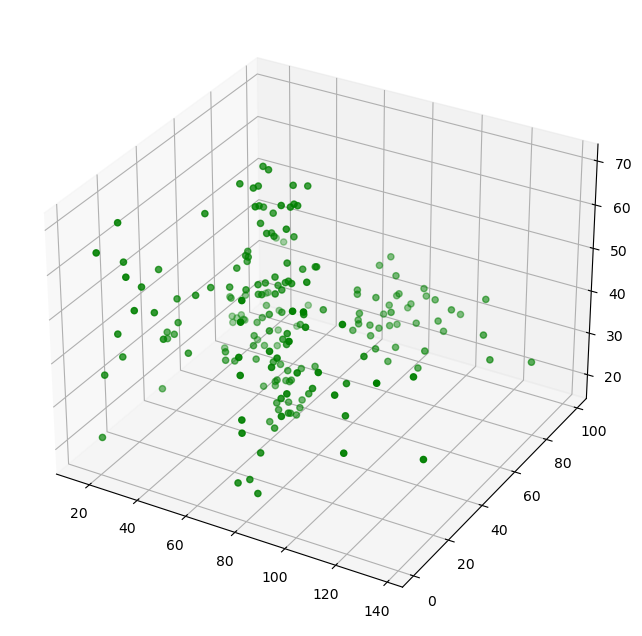

In [130]:
plt.figure(figsize=(10,8))
ax = plt.axes(projection ="3d")
#plt.scatter(x=centers.x,y=centers.y,s=100,c='black',marker='X')
#sns.scatterplot(data=sale,x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',hue= 'All Cluster' ,palette= 'tab10');

ax.scatter3D(data=sale,xs='Annual Income (k$)',ys='Spending Score (1-100)',zs='Age', color="green")